In [1]:
#Reference video https://www.youtube.com/watch?v=uErL6gJPN6U&t=2020s
#import important libraries for web scraping
from bs4 import BeautifulSoup as soup


In [48]:
import urllib.request as urlrq
import certifi
import ssl
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt


In [3]:
resp = urlrq.urlopen("https://www.flipkart.com/q/best-laptops-under-rs-50000", context=ssl.create_default_context(cafile=certifi.where()))

In [4]:
webdata = resp.read()
print(webdata)

b'<!doctype html><html lang="en"><head><link href="https://rukminim1.flixcart.com" rel="preconnect"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app_modules.chunk.905c37.css"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app.chunk.b2f6f5.css"/><meta http-equiv="Content-type" content="text/html; charset=utf-8"/><meta http-equiv="X-UA-Compatible" content="IE=Edge"/><meta property="fb:page_id" content="102988293558"/><meta property="fb:admins" content="658873552,624500995,100000233612389"/><meta name="robots" content="noodp"/><link rel="shortcut icon" href="https:///www/promos/new/20150528-140547-favicon-retina.ico"/><link type="application/opensearchdescription+xml" rel="search" href="/osdd.xml?v=2"/><meta property="og:type" content="website"/><meta name="og_site_name" property="og:site_name" content="Flipkart.com"/><link rel="apple-touch-icon" sizes="57x57" href="/apple-touch-icon-57x57.

In [5]:
soupdata = soup(webdata)
type(soupdata)

bs4.BeautifulSoup

In [6]:
dir(soup)

['ASCII_SPACES',
 'DEFAULT_BUILDER_FEATURES',
 'NO_PARSER_SPECIFIED_WARNING',
 'ROOT_TAG_NAME',
 '__bool__',
 '__call__',
 '__class__',
 '__contains__',
 '__copy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '__weakref__',
 '_all_strings',
 '_check_markup_is_url',
 '_feed',
 '_find_all',
 '_find_one',
 '_is_xml',
 '_lastRecursiveChild',
 '_last_descendant',
 '_linkage_fixer',
 '_popToTag',
 '_should_pretty_print',
 'append',
 'childGenerator',
 'children',
 'clear',
 'decode',
 'decode_contents',
 'decompose',
 'descendants',
 'encode',
 'encode_contents',
 'endData',
 'ex

In [7]:
containers = soupdata.findAll('div',{'class':'_2kHMtA'})

In [8]:
print(type(containers),len(containers))

<class 'bs4.element.ResultSet'> 24


In [9]:
containers[0] # data of first containers

<div class="_2kHMtA"><a class="_1fQZEK" href="/asus-tuf-gaming-f15-core-i5-10th-gen-8-gb-512-gb-ssd-windows-11-home-4-graphics-nvidia-geforce-gtx-1650-144-hz-fx506lhb-hn358w-laptop/p/itm4d930ab779cbd?pid=COMGF9Z7JYCFBKAP&amp;lid=LSTCOMGF9Z7JYCFBKAPXYET0O&amp;marketplace=FLIPKART&amp;store=6bo%2Fb5g&amp;spotlightTagId=BestsellerId_6bo%2Fb5g&amp;srno=b_1_1&amp;otracker=browse&amp;fm=organic&amp;iid=3afa9ed7-32e4-4842-b6b7-73e025ad9247.COMGF9Z7JYCFBKAP.SEARCH&amp;ppt=None&amp;ppn=None&amp;ssid=5at4vez08w0000001679409801348" rel="noopener noreferrer" target="_blank"><div></div><div class="MIXNux"><div class="_2QcLo-"><div><div class="CXW8mj" style="height:200px;width:200px"><img alt="ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/512 GB SSD/Windows 11 Home/4 GB Graphics/NVIDIA GeForce G..." class="_396cs4" loading="eager" src="https://rukminim1.flixcart.com/image/312/312/l3rmzrk0/computer/s/z/r/-original-imagetgzg4pgszmt.jpeg?q=70"/></div></div></div><div class="_3wLduG"><div class="_3PzNI-"

In [55]:
f = open('laptops_info.csv','wb')
f.write('ProductName,Stars,Ratings,Reviews,CurrentPrice,MRP,Processor,RAM,Storage,ImageURL\n'.encode())
for container in containers:
    #Finding product name
    product = container.find('div',{'class':'_4rR01T'})
    ProductName = product.text.split('-')[0].strip()
    
    #finding stars
    stars = container.find('div',{'class':'_3LWZlK'})
    try:
        Stars = stars.text
    except:
        Stars = 0
    
    #finding ratings and reviews
    Rating = container.find('span',{'class':'_2_R_DZ'})
    try:
        ratRev = re.findall('\d+,?\d*',Rating.text)
        Ratings = ratRev[0].replace(',','')
        Reviews = ratRev[1].replace(',','')
    except:
        Ratings = 0
        Reviews = 0
        
    #finding current price
    CurrentPrice = container.find('div',{'class':'_30jeq3 _1_WHN1'}).text.replace(',','').replace('₹','')
    
    #finding MRP
    mrp = container.find('div',{'class':'_3I9_wc _27UcVY'})
    try:
        MRP = mrp.text.replace(',','').replace('₹','')
    except:
        MRP = 0
    
    #finding information about the product
    info = container.findAll('li',{'class':'rgWa7D'})
    Processor = info[0].text
    RAM = info[1].text
    Storage = info[3].text
    
    # finding image
    Image = container.img
    ImageURL = Image.get('src')
    
    print(ProductName,Stars,Ratings,Reviews,CurrentPrice,MRP,Processor,RAM,Storage,ImageURL)
    f.write(f"{ProductName},{Stars},{Ratings},{Reviews},{CurrentPrice},{MRP},{Processor},{RAM},{Storage},{ImageURL}\n".encode())
    print('\n')
f.close()
   

ASUS TUF Gaming F15 Core i5 10th Gen 4.4 5280 523 49990 70990 Intel Core i5 Processor (10th Gen) 8 GB DDR4 RAM 512 GB SSD https://rukminim1.flixcart.com/image/312/312/l3rmzrk0/computer/s/z/r/-original-imagetgzg4pgszmt.jpeg?q=70


HP 15s Intel Core i3 11th Gen 4.3 479 50 40450 50585 Intel Core i3 Processor (11th Gen) 8 GB DDR4 RAM 512 GB SSD https://rukminim1.flixcart.com/image/312/312/l5h2xe80/computer/e/i/d/15s-fr2511tu-thin-and-light-laptop-hp-original-imagg59a7s5kymvy.jpeg?q=70


HP Laptop with Backlit Keyboard Core i3 11th Gen 4.5 81 9 41320 51724 Intel Core i3 Processor (11th Gen) 8 GB DDR4 RAM 512 GB SSD https://rukminim1.flixcart.com/image/312/312/xif0q/computer/l/z/u/15s-fr2512tu-laptop-hp-original-imaggmeygbtemggf.jpeg?q=70


Lenovo V15 G2 Core i3 11th Gen 4.3 107 6 39490 59390 Intel Core i3 Processor (11th Gen) 8 GB DDR4 RAM 1 TB HDD|256 GB SSD https://rukminim1.flixcart.com/image/312/312/xif0q/computer/d/t/c/v15-g2-alc-laptop-lenovo-original-imaghq2ffspmtfuh.jpeg?q=70


ASUS

In [56]:
df = pd.read_csv('laptops_info.csv')
df

,ProductName,Stars,Ratings,Reviews,CurrentPrice,MRP,Processor,RAM,Storage,ImageURL
0,ASUS TUF Gaming F15 Core i5 10th Gen,4.4,5280,523,49990,70990,Intel Core i5 Processor (10th Gen),8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/l...
1,HP 15s Intel Core i3 11th Gen,4.3,479,50,40450,50585,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/l...
2,HP Laptop with Backlit Keyboard Core i3 11th Gen,4.5,81,9,41320,51724,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/x...
3,Lenovo V15 G2 Core i3 11th Gen,4.3,107,6,39490,59390,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,1 TB HDD|256 GB SSD,https://rukminim1.flixcart.com/image/312/312/x...
4,ASUS Vivobook 15 Core i5 11th Gen,4.2,265,25,47990,69990,Intel Core i5 Processor (11th Gen),8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/x...
5,HP 14s Intel Core i3 11th Gen,4.3,3770,337,40990,50696,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/l...
6,MSI Bravo 15 Ryzen 5 Hexa Core AMD R5,4.4,2405,322,49990,72990,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/x...
7,acer Ryzen 5 Quad Core 7520U,0.0,0,0,50999,0,AMD Ryzen 5 Quad Core Processor,8 GB LPDDR5 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/x...
8,HP 15s Intel Core i3 12th Gen,4.3,228,31,44990,56260,Intel Core i3 Processor (12th Gen),8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/x...
9,Lenovo IdeaPad 3 Ryzen 5 Hexa Core 5500U,4.3,1666,188,44276,68490,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/x...


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 10 columns):
ProductName     24 non-null object
Stars           24 non-null float64
Ratings         24 non-null int64
Reviews         24 non-null int64
CurrentPrice    24 non-null int64
MRP             24 non-null int64
Processor       24 non-null object
RAM             24 non-null object
Storage         24 non-null object
ImageURL        24 non-null object
dtypes: float64(1), int64(4), object(5)
memory usage: 2.0+ KB


### Product having highest Rating

In [58]:
row_index = np.where(df['Ratings']==max(df['Ratings']))
df.iloc[row_index]

,ProductName,Stars,Ratings,Reviews,CurrentPrice,MRP,Processor,RAM,Storage,ImageURL
0,ASUS TUF Gaming F15 Core i5 10th Gen,4.4,5280,523,49990,70990,Intel Core i5 Processor (10th Gen),8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/l...


In [59]:
df.sort_values(by=['Ratings'],ascending=False).head()


,ProductName,Stars,Ratings,Reviews,CurrentPrice,MRP,Processor,RAM,Storage,ImageURL
0,ASUS TUF Gaming F15 Core i5 10th Gen,4.4,5280,523,49990,70990,Intel Core i5 Processor (10th Gen),8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/l...
5,HP 14s Intel Core i3 11th Gen,4.3,3770,337,40990,50696,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/l...
6,MSI Bravo 15 Ryzen 5 Hexa Core AMD R5,4.4,2405,322,49990,72990,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/x...
9,Lenovo IdeaPad 3 Ryzen 5 Hexa Core 5500U,4.3,1666,188,44276,68490,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/x...
10,HP Ryzen 5 Hexa Core 5500U,4.3,1284,98,45490,54552,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/x...


<function matplotlib.pyplot.show(*args, **kw)>

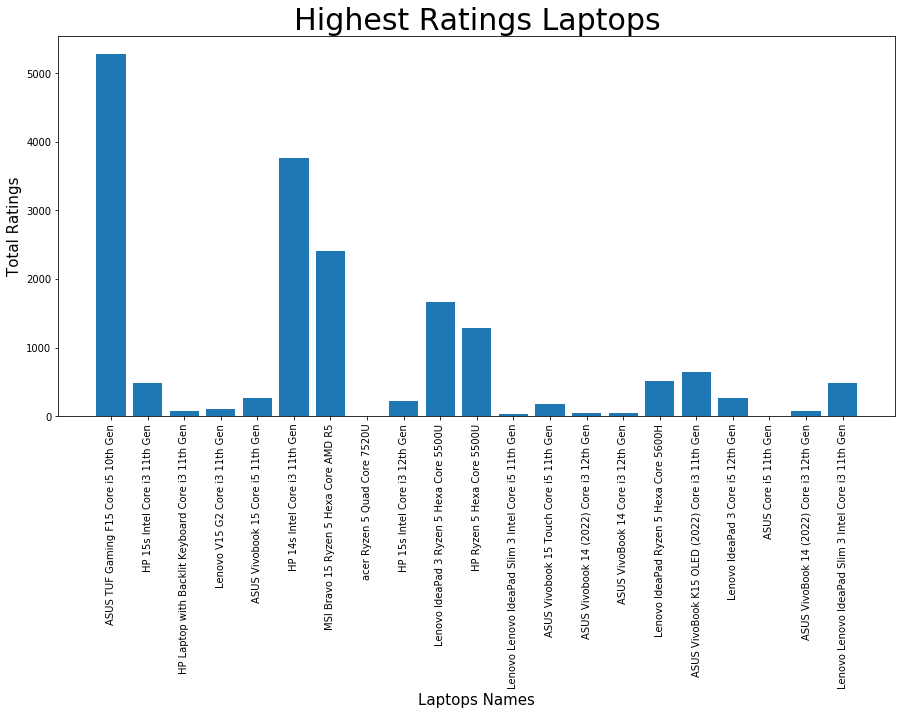

In [60]:
plt.figure(figsize=(15,7))
plt.bar(x=df['ProductName'],height=df['Ratings'])
plt.title("Highest Ratings Laptops",fontsize=30)
plt.xlabel("Laptops Names",fontsize=15)
plt.ylabel("Total Ratings",fontsize=15)
plt.xticks(rotation= 90)
plt.show

### Lowest price laptops

In [62]:
df.sort_values(by=['CurrentPrice'],ascending=True).head()

,ProductName,Stars,Ratings,Reviews,CurrentPrice,MRP,Processor,RAM,Storage,ImageURL
23,Lenovo Lenovo IdeaPad Slim 3 Intel Core i3 11t...,4.3,489,46,38426,59890,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/x...
3,Lenovo V15 G2 Core i3 11th Gen,4.3,107,6,39490,59390,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,1 TB HDD|256 GB SSD,https://rukminim1.flixcart.com/image/312/312/x...
1,HP 15s Intel Core i3 11th Gen,4.3,479,50,40450,50585,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/l...
5,HP 14s Intel Core i3 11th Gen,4.3,3770,337,40990,50696,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/l...
2,HP Laptop with Backlit Keyboard Core i3 11th Gen,4.5,81,9,41320,51724,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/x...


<function matplotlib.pyplot.show(*args, **kw)>

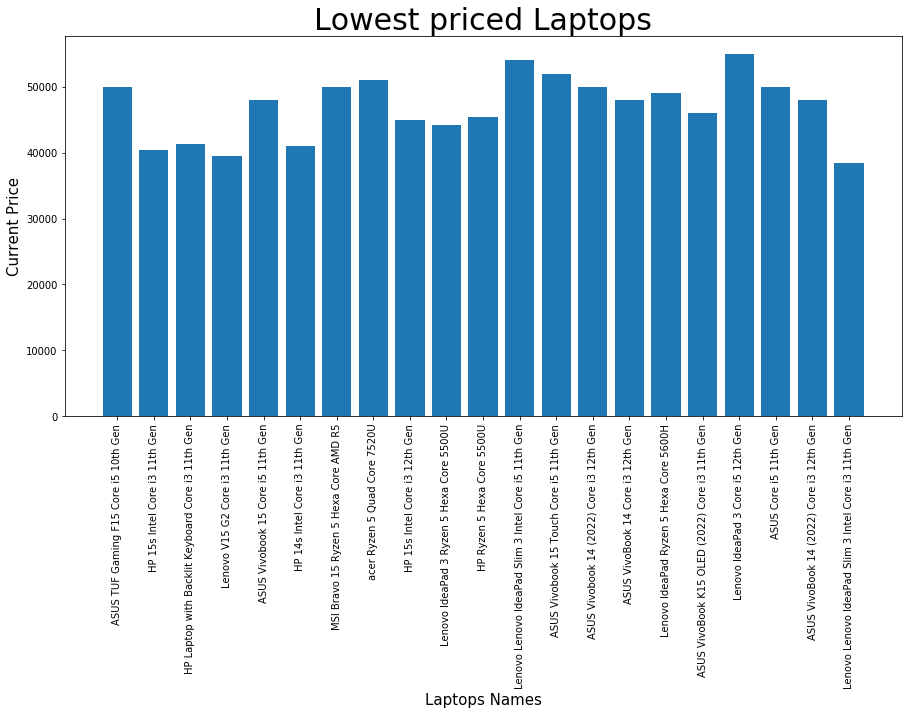

In [63]:
plt.figure(figsize=(15,7))
plt.bar(x=df['ProductName'],height=df['CurrentPrice'])
plt.title("Lowest priced Laptops",fontsize=30)
plt.xlabel("Laptops Names",fontsize=15)
plt.ylabel("Current Price",fontsize=15)
plt.xticks(rotation= 90)
plt.show